# 1. MNIST_DNN

## DNN_Best Model은 Epoch 15, 정확도는 98.55%

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

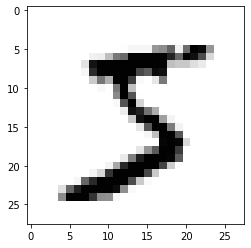

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d' %i)
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [6]:
# 정규화 과정
X_train = X_train.reshape(X_train.shape[0], 784)
#X_train = X_train.astype('float65')
X_train = X_train / 255.0

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [9]:
Y_class_train[0]

5

In [10]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [11]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

In [13]:
seed=2020
np.random.seed(seed)

In [14]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(350, activation='relu'),
    Dense(250, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 350)               179550    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               87750     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 695,330
Trainable params: 695,330
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [17]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [18]:
modelpath = MODEL_DIR +'mnist{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience =10)

In [19]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3000, batch_size=200, verbose=0, callbacks = [early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.12372, saving model to ./model/mnist01-0.1237.hdf5

Epoch 00002: val_loss improved from 0.12372 to 0.09474, saving model to ./model/mnist02-0.0947.hdf5

Epoch 00003: val_loss improved from 0.09474 to 0.07740, saving model to ./model/mnist03-0.0774.hdf5

Epoch 00004: val_loss did not improve from 0.07740

Epoch 00005: val_loss did not improve from 0.07740

Epoch 00006: val_loss did not improve from 0.07740

Epoch 00007: val_loss improved from 0.07740 to 0.06776, saving model to ./model/mnist07-0.0678.hdf5

Epoch 00008: val_loss did not improve from 0.06776

Epoch 00009: val_loss did not improve from 0.06776

Epoch 00010: val_loss did not improve from 0.06776

Epoch 00011: val_loss did not improve from 0.06776

Epoch 00012: val_loss did not improve from 0.06776

Epoch 00013: val_loss did not improve from 0.06776

Epoch 00014: val_loss did not improve from 0.06776

Epoch 00015: val_loss improved from 0.06776 to 0.06657, saving model to ./model

In [24]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/mnist15-0.0666.hdf5')

In [25]:
print('\n Test Accuracy: %.4f' %(model.evaluate(X_test, Y_test, verbose=2)[1])) 

10000/10000 - 0s - loss: 0.0666 - accuracy: 0.9855

 Test Accuracy: 0.9855


In [26]:

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

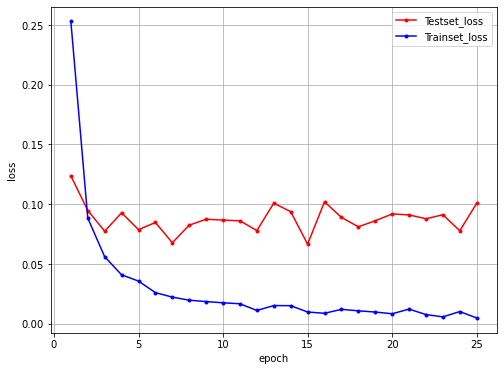

In [27]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize = (8,6))
plt.plot(x_len, y_vloss, marker='.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')

plt.legend(loc='upper right')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 2. MNIST_CNN

## CNN_Best Model은 Epoch 15, 정확도는 99.32%

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os

In [5]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
#X_test.shape[0] = -1
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [29]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1), activation = 'relu'), #컨볼루션 층 생성
    Conv2D(64, (3, 3), activation='relu'), #컨볼루션 층 추가
    MaxPooling2D(pool_size=2), #컨볼루션 결과 축소
    Dropout(0.25), #25% 노드를 끄는 것
    Flatten(), #일차원으로 바꿔주는 레이어
    Dense(128, activation='relu'), 
    Dropout(0.5), #50% 노드를 끄는 것
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [30]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

In [31]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [32]:
modelpath = MODEL_DIR + 'minst-cnn-{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only=True)
early_stopping_callbak = EarlyStopping(monitor='val_loss', patience=10)

In [33]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size = 200, callbacks = [early_stopping_callbak, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
59800/60000 [============================>.] - ETA: 0s - loss: 0.2985 - accuracy: 0.9065
Epoch 00001: val_loss improved from inf to 0.06270, saving model to ./model/minst-cnn-01-0.0627.hdf5
60000/60000 [==============================] - 44s 737us/sample - loss: 0.2981 - accuracy: 0.9066 - val_loss: 0.0627 - val_accuracy: 0.9797
Epoch 2/50
59800/60000 [============================>.] - ETA: 0s - loss: 0.0934 - accuracy: 0.9721
Epoch 00002: val_loss improved from 0.06270 to 0.04445, saving model to ./model/minst-cnn-02-0.0444.hdf5
60000/60000 [==============================] - 44s 740us/sample - loss: 0.0933 - accuracy: 0.9721 - val_loss: 0.0444 - val_accuracy: 0.9855
Epoch 3/50
59800/60000 [============================>.] - ETA: 0s - loss: 0.0708 - accuracy: 0.9793
Epoch 00003: val_loss improved from 0.04445 to 0.03596, saving model to ./model/minst-cnn-03-0.0360.hdf5
60000/60000 [==============================] - 44s 731us/sa

In [34]:
from tensorflow.keras.models import load_model
del model

In [35]:
model = load_model('model/minst-cnn-15-0.0277.hdf5')

In [36]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' %(model.evaluate(X_test, Y_test, verbose=0)[1]))


 Test Accuracy: 0.9932


In [37]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

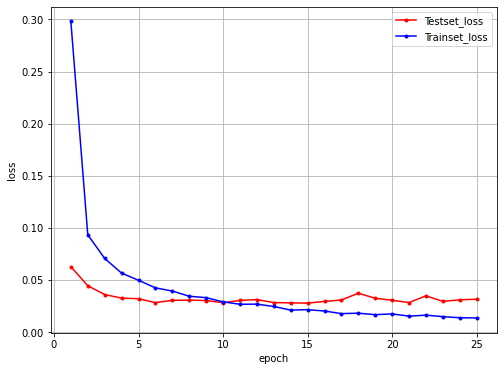

In [38]:
# 그래프로 표현
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')

plt.legend(loc='upper right')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()